Looking at all the STIS (and eventually all of the UV?) data

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from craftroom import resample
import stistools
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting
from scipy.io.idl import readsav


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


In [2]:
path = '/media/david/5tb_storage1/muscles/stis_x1ds/'
allspecs = np.hstack((glob.glob(path+'*x1d.fits'), glob.glob(path+'*sx1.fits')))
#allspecs
stars = os.listdir(path)
stars


['2MASS-J23062928-0502285',
 'GJ1132',
 'GJ15A',
 'GJ163',
 'GJ649',
 'GJ674',
 'GJ676A',
 'GJ699',
 'GJ729',
 'GJ849',
 'L-980-5',
 'LHS-2686']

In [3]:
"""stars = []
gratings = []
for x in allspecs:
    hdr = fits.getheader(x)
    star = hdr['TARGNAME']
    if star != 'LP-756-18':
        stars.append(star)
        gratings.append(hdr['OPT_ELEM'])
    
stars = np.unique(stars)
gratings = np.unique(gratings)
print(stars)
print(gratings)"""

"stars = []\ngratings = []\nfor x in allspecs:\n    hdr = fits.getheader(x)\n    star = hdr['TARGNAME']\n    if star != 'LP-756-18':\n        stars.append(star)\n        gratings.append(hdr['OPT_ELEM'])\n    \nstars = np.unique(stars)\ngratings = np.unique(gratings)\nprint(stars)\nprint(gratings)"

In [4]:
"""for star in stars:
    print(star)
    for x in allspecs:
        hdr = fits.getheader(x)
        if hdr['TARGNAME'] == star:
            if hdr['OPT_ELEM'] not in ['G140M', 'E140M']:
                data = fits.getdata(x, 1)[0]
                w, f , e , dq = data['WAVELENGTH'],data['FLUX'], data['ERROR'],data['DQ']
              #  w, f, e = w[dq ==0], f[dq ==0], e[dq ==0]
                plt.step(w, f, where='mid')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()"""

"for star in stars:\n    print(star)\n    for x in allspecs:\n        hdr = fits.getheader(x)\n        if hdr['TARGNAME'] == star:\n            if hdr['OPT_ELEM'] not in ['G140M', 'E140M']:\n                data = fits.getdata(x, 1)[0]\n                w, f , e , dq = data['WAVELENGTH'],data['FLUX'], data['ERROR'],data['DQ']\n              #  w, f, e = w[dq ==0], f[dq ==0], e[dq ==0]\n                plt.step(w, f, where='mid')\n    plt.xscale('log')\n    plt.yscale('log')\n    plt.show()"

In [5]:
#import prepare_stis

In [6]:
#prepare_stis.make_stis_spectum(path, 1, savepath = 'stis_test_output/', plot=False, save_ecsv=True, save_fits=False)

In [7]:
os.listdir('stis_test_output')

['L-980-5',
 'GJ674',
 '2MASS-J23062928-0502285',
 'GJ676A',
 'GJ649',
 'GJ699',
 'GJ163',
 'GJ849',
 'GJ1132',
 'LHS-2686',
 'GJ729',
 'GJ15A']

In [8]:
"""for star in stars:
    specs = np.hstack((glob.glob(path+'*x1d.fits'), glob.glob(path+'*sx1.fits')))
    for x in specs:
        if x in specs:
            hdr = fits.getheader(x)
            if hdr['TARGNAME'] == star:
                filename = os.path.split(x)[1]
                #print(filename)
                os.rename(x, path+star+'/'+filename)
            """

"for star in stars:\n    specs = np.hstack((glob.glob(path+'*x1d.fits'), glob.glob(path+'*sx1.fits')))\n    for x in specs:\n        if x in specs:\n            hdr = fits.getheader(x)\n            if hdr['TARGNAME'] == star:\n                filename = os.path.split(x)[1]\n                #print(filename)\n                os.rename(x, path+star+'/'+filename)\n            "

In [9]:
import prepare_stis
for star in stars:
    prepare_stis.make_stis_spectum(path+star+'/', 1, savepath = 'stis_test_output/'+star+'/', plot=False, save_ecsv=True, save_fits=False)

/home/david/work/muscles/SEDs/common/prepare_stis.py:31: RuntimeWarning: divide by zero encountered in true_divide
  weights = 1 / (e_array**2)
/home/david/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:422: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


Spectrum saved as hlsp_muscles_hst_stis_2mass-j23062928-0502285_g140m_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_2mass-j23062928-0502285_g430l_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj1132_g140m_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj1132_g230l_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj1132_g430l_v1_component-spec.ecsv
yes
Spectrum saved as hlsp_muscles_hst_stis_gj15a_e140m_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj15a_g430l_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj163_g140m_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj163_g230l_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj163_g430l_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj649_g140l_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj649_g140m_v1_component-spec.ecsv
Spectrum saved as hlsp_muscles_hst_stis_gj649_g230l_v1_co

2MASS-J23062928-0502285


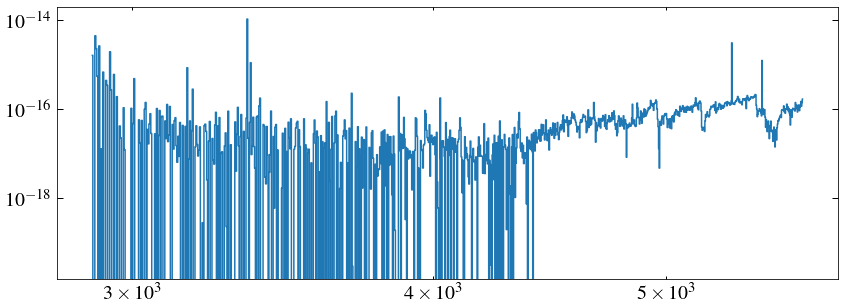

GJ1132


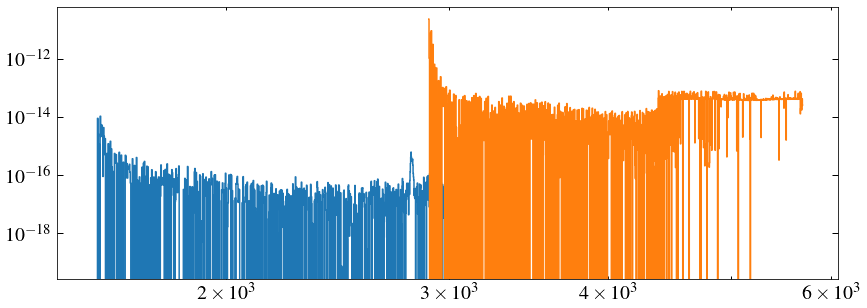

GJ15A


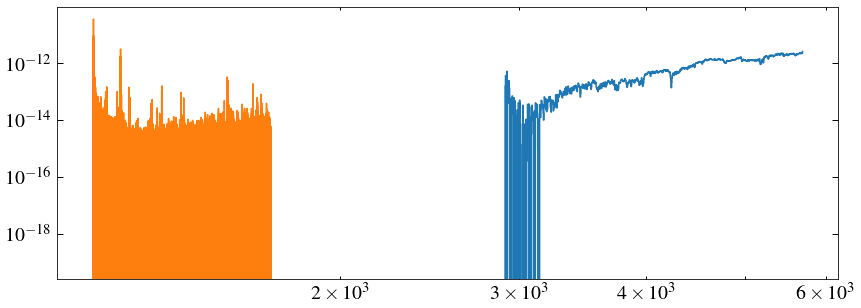

GJ163


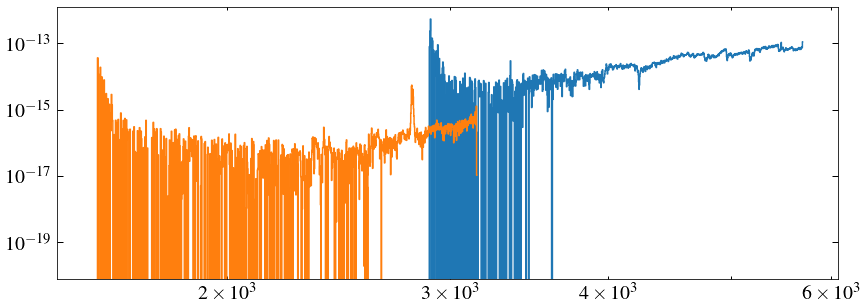

GJ649


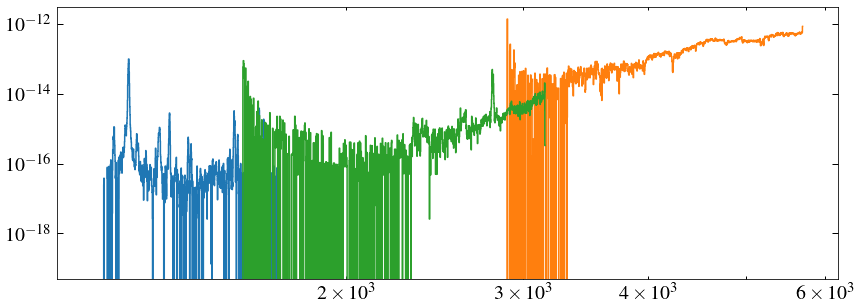

GJ674


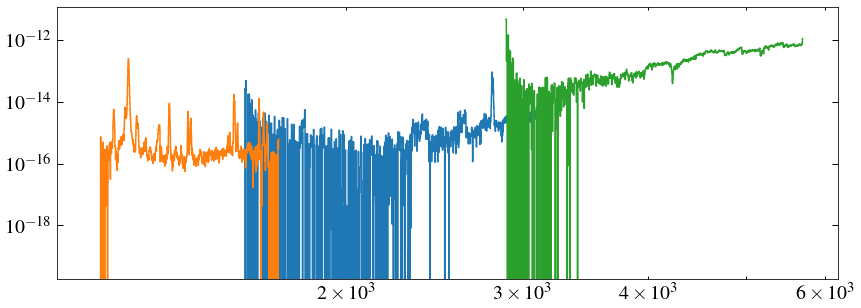

GJ676A


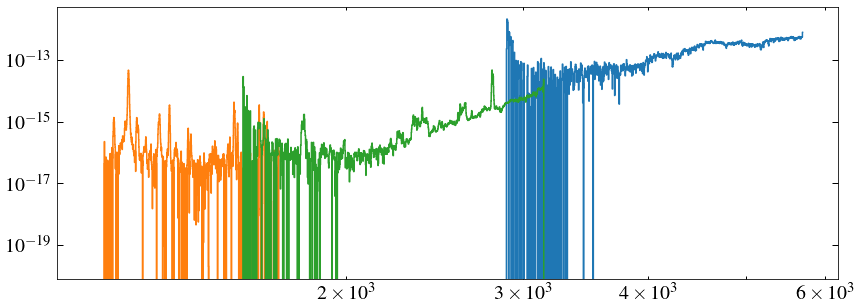

GJ699


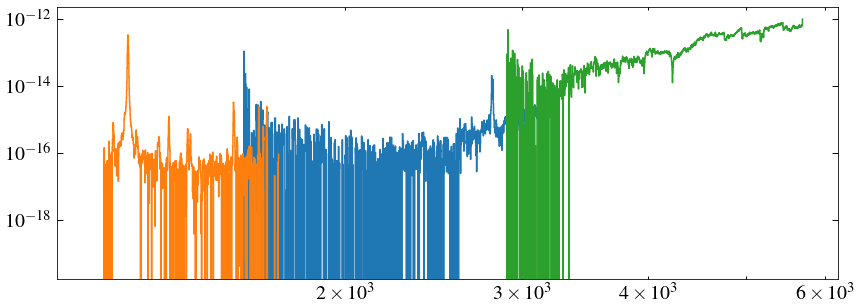

GJ729


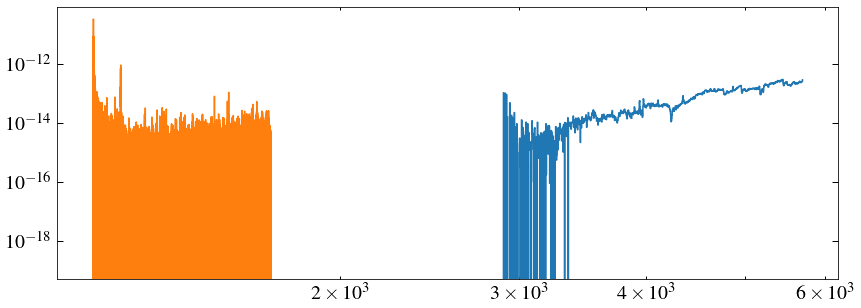

GJ849


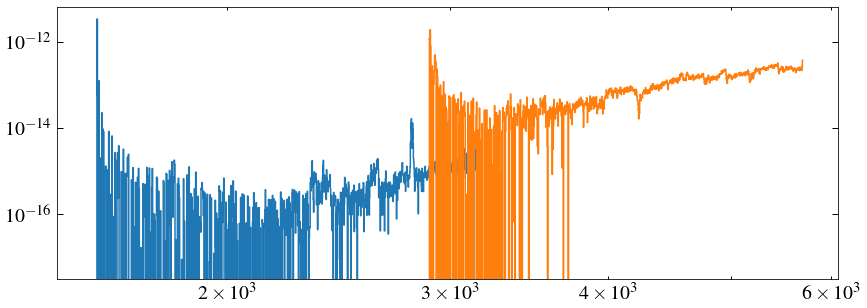

L-980-5


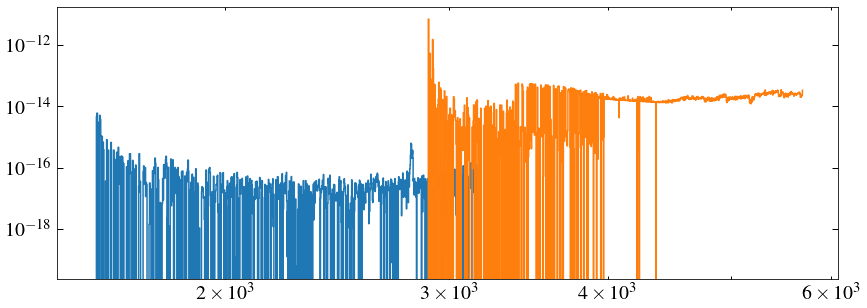

LHS-2686


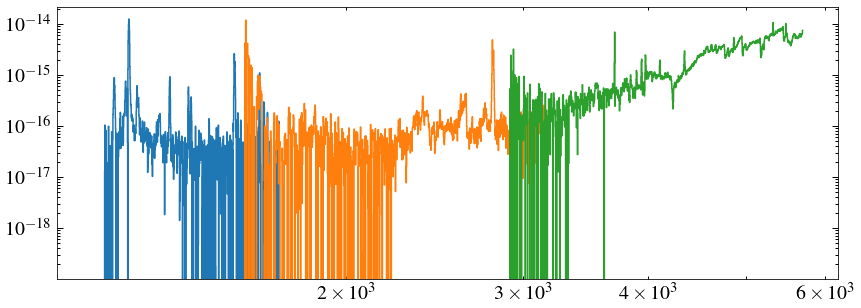

In [17]:
for star in stars:
    print(star)
    specs = glob.glob('stis_test_output/'+star+'/*ecsv')
    for spec in specs:
        data= Table.read(spec)
        if data.meta['GRATING'] not in ['G140M']:
             plt.step(data['WAVELENGTH'], data['FLUX'], where='mid')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
        

Also need Tom Ayre's E140M data...

In [11]:
for star in stars:
   # print(star)
    specs = glob.glob('stis_test_output/'+star+'/*ecsv')
    for spec in specs:
        data= Table.read(spec)
        if data.meta['GRATING'] == 'E140M':
            print(star)

GJ15A
GJ729


In [12]:
e140ms = glob.glob('ayres_e140m/*sav*')
e140ms

['ayres_e140m/GJ15A_E140M_coadd.sav', 'ayres_e140m/GJ729_E140M_coadd.sav']

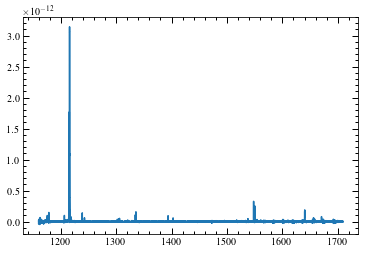

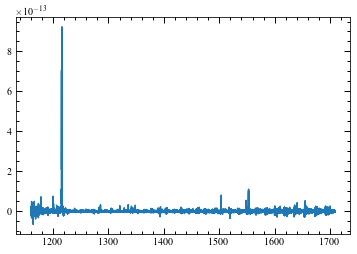

In [13]:
for x in e140ms:
    data = readsav(x)
    w, f, e = data['wave'], data['flux'], data['photerr']
    mask = (w > 1160)
    w, f, e = w[mask], f[mask], e[mask] 
    plt.step(w, f, where='mid')
    plt.show()

In [14]:
data

{'wave': array([1140.25640181, 1140.26872572, 1140.28104939, ..., 1709.19704977,
        1709.2151071 , 1709.23316407]),
 'flux': array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.3985969e-15, -1.6855089e-16, -1.2834798e-15], dtype=float32),
 'photerr': array([0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 5.554578e-15,
        5.151277e-15, 5.261830e-15], dtype=float32),
 'epsilon': array([500, 500, 500, ...,   0,   0,   0], dtype=int16),
 'texpt': array([    0.  ,     0.  ,     0.  , ..., 18061.35, 18061.35, 17242.2 ],
       dtype=float32),
 'xorder': array([129., 129., 129., ...,  87.,  87.,  87.]),
 'total_texps': 18061.35,
 'total_counts': 49019.207}

In [15]:
#plt.plot(data['wave'], data['epsilon'])

The ones with e140m data also had G230LB observations, need to figure that out.

In [20]:
for star in ['GJ15A', 'GJ729']:
    print(os.listdir(path+star))

['odlm08010_sx1.fits', 'odlm08030_x1d.fits', 'odlm08040_x1d.fits', 'odlm08050_x1d.fits', 'odlm08060_x1d.fits', 'odlm09010_sx1.fits', 'odlm09030_x1d.fits', 'odlm09040_x1d.fits', 'odlm09050_x1d.fits', 'odlm09060_x1d.fits']
['odlm37010_sx1.fits', 'odlm37030_x1d.fits', 'odlm37040_x1d.fits', 'odlm37050_x1d.fits', 'odlm37060_x1d.fits', 'odlm38010_sx1.fits', 'odlm38030_x1d.fits', 'odlm38040_x1d.fits', 'odlm38050_x1d.fits']
